** ALgerian Forest Fires dataset**

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region. 

The period from June 2012 to September 2012. 
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.



1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations 
2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90 
4. Ws :Wind speed in km/h: 6 to 29 
5. Rain: total day in mm: 0 to 16.8
FWI Components  
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
8. Drought Code (DC) index from the FWI system:  7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely   â€œFireâ€ and â€œnot Fireâ€

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [97]:
df = pd.read_csv("E:\\Learning\\Datasets\\ALgerian forest fire dataset\\Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [98]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


##Data clearning

In [100]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [101]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


#dataset is devided into two region bejaia region then another dataset into sidi beal 

The dataset is converted into two sets based on region from 122th index we can make a new column based on the region

1 : Bejaia region dataset
2 : Sidi-bel abbes region dataset

add new column with region

In [102]:
df.loc[:126,"Region"] = 0
df.loc[126:,"Region"] = 1 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [103]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [104]:
df[["Region"]] = df[["Region"]].astype(int)

In [105]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [106]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [107]:
df[df.isnull().any(axis=1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


##remove the null values


In [108]:
df = df.dropna().reset_index(drop=True)

In [109]:
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [110]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [111]:
df =df.drop(122).reset_index(drop=True)

In [112]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [113]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [114]:
# fix spaces in column name 

df.columns = df.columns.str.strip()

In [115]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


## change the required columns as integer datatype



In [117]:
for col in ["month", "year", "Temperature", "RH", "Ws"]:
    print(f"Unique values in {col}:")
    print(df[col].unique())



Unique values in month:
['06' '07' '08' '09']
Unique values in year:
['2012']
Unique values in Temperature:
['29' '26' '25' '27' '31' '33' '30' '28' '32' '34' '35' '36' '37' '22'
 '24' '38' '39' '40' '42']
Unique values in RH:
['57' '61' '82' '89' '77' '67' '54' '73' '88' '79' '65' '81' '84' '78'
 '80' '55' '62' '66' '64' '53' '47' '50' '68' '75' '76' '63' '69' '70'
 '59' '48' '45' '60' '51' '52' '58' '86' '74' '71' '49' '44' '41' '42'
 '90' '87' '72' '46' '37' '36' '56' '43' '83' '29' '34' '33' '35' '39'
 '31' '21' '40' '24' '38' '26']
Unique values in Ws:
['18' '13' '22' '16' '14' '15' '12' '19' '21' '20' '17' '26' '11' '10' '9'
 '8' '6' '29']


In [118]:
df[["day","month", "year", "Temperature", "RH", "Ws"]] = df[["day","month", "year", "Temperature", "RH", "Ws"]].astype(int)


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [120]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [121]:
objects = [feature for feature in df.columns if df[feature].dtypes == 'object']

In [122]:
for i in objects:
    if i!= 'Classes':
        df[i] = df[i].astype(float)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [124]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.489712
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.500926
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [125]:
#lets save the cleaned dataset

df.to_csv("E:\\Learning\\Datasets\\ALgerian forest fire dataset\\AlgerianDatasetCleaned.csv", index=False)

In [126]:
#EXploratory data analysis
#drop day month and year
df_copy = df.drop(["day","month","year"],axis=1)

In [127]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [128]:
#do the encoding of the catagory in class

df_copy['Classes'] = np.where(df_copy['Classes'].astype(str).str.contains('not fire', na=False), 0, 1)


In [129]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [130]:
#Catagories in classes
df_copy["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [139]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


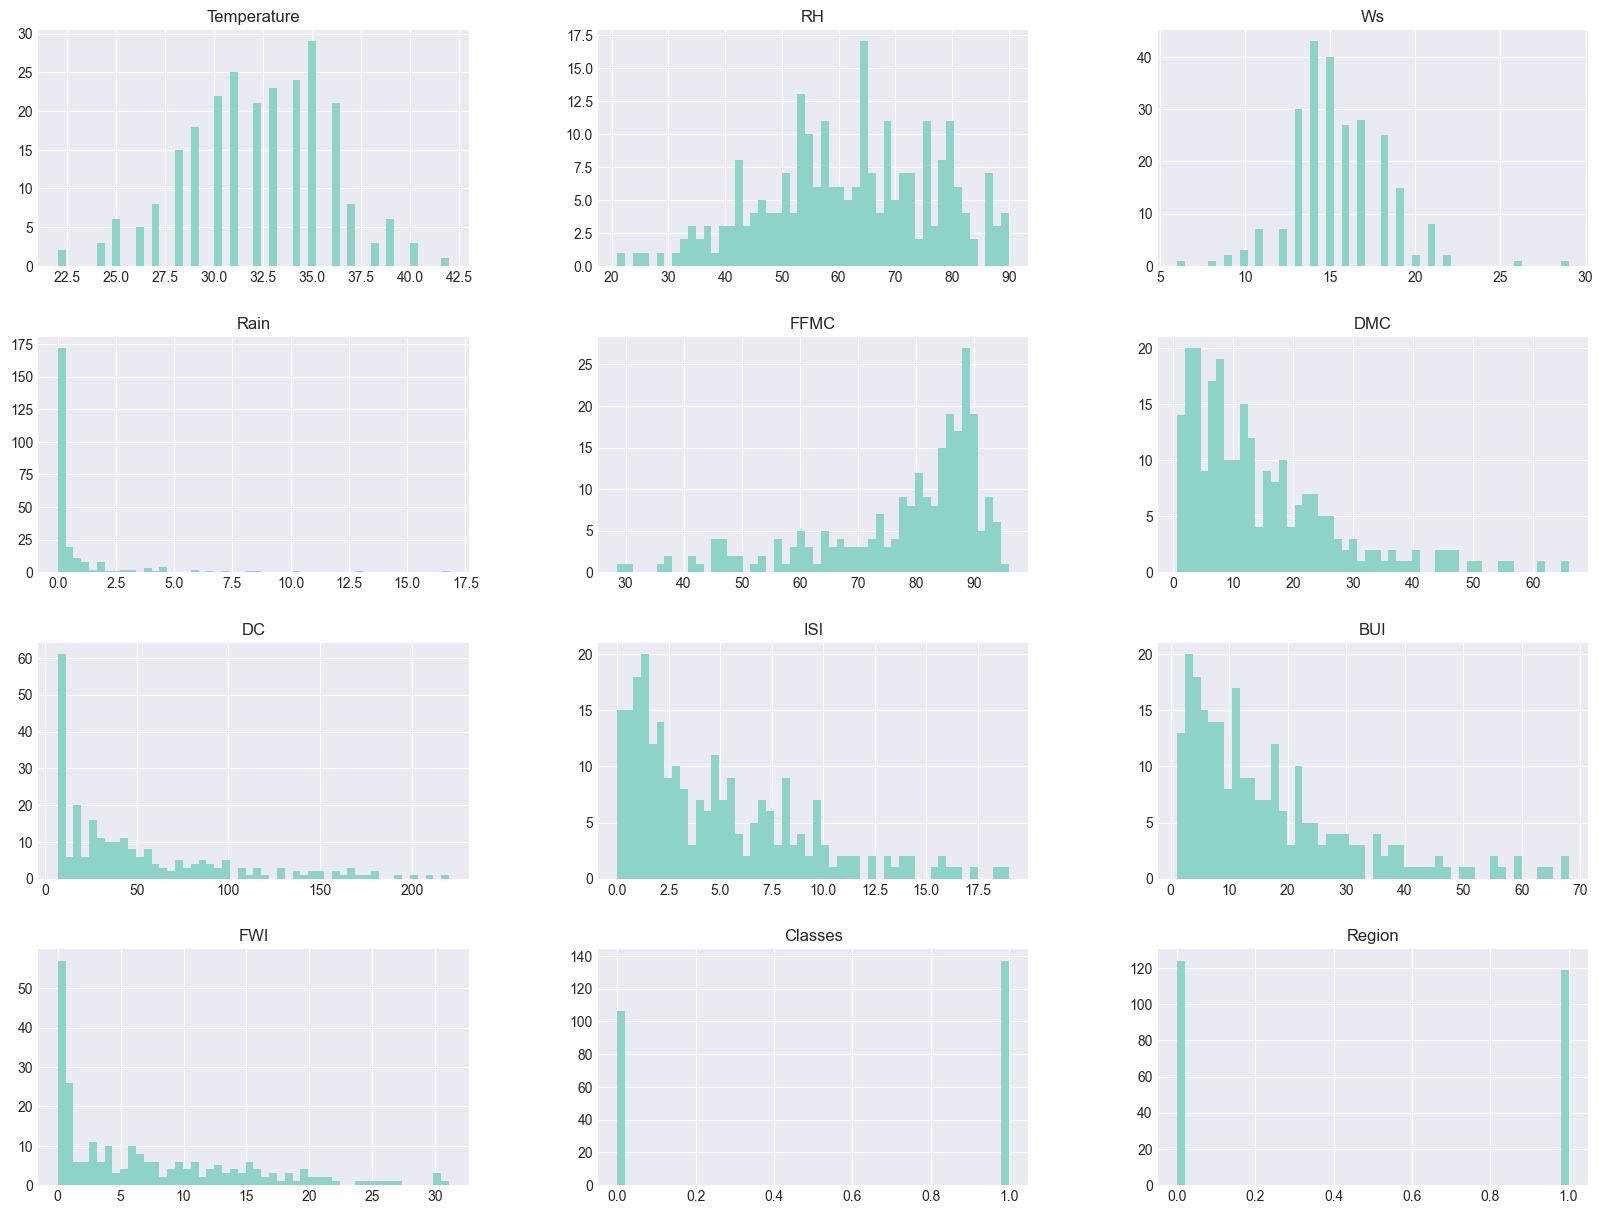

In [141]:
import seaborn as sns


plt.style.use('seaborn-v0_8-darkgrid')  # ✅ Correct


df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [143]:
percentage = df_copy['Classes'].value_counts(normalize=True)*100
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

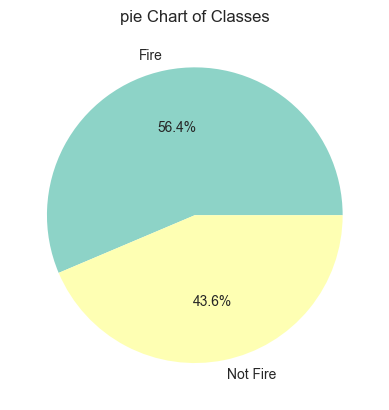

In [145]:
classLabels = ["Fire","Not Fire"]
plt.Figure(figsize=(12,7))
plt.pie(percentage,labels=classLabels,autopct='%1.1f%%')
plt.title("pie Chart of Classes")
plt.show()

In [146]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.274850
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.413844
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.163627
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.053092
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.246939
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.208210
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.064410
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.279702
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.105475
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.212299


<Axes: >

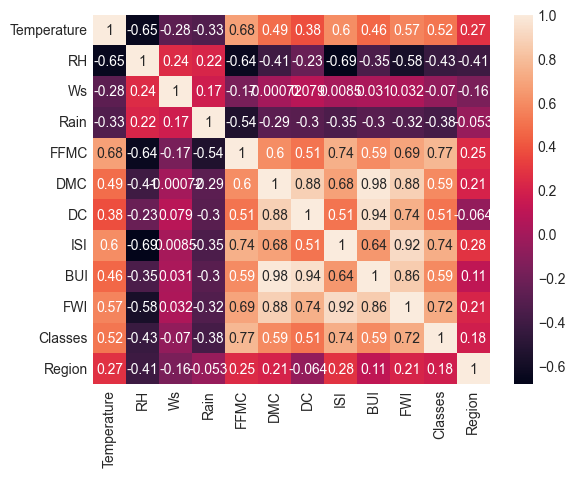

In [152]:
sns.heatmap(df_copy.corr(),annot=True)

<Axes: ylabel='FWI'>

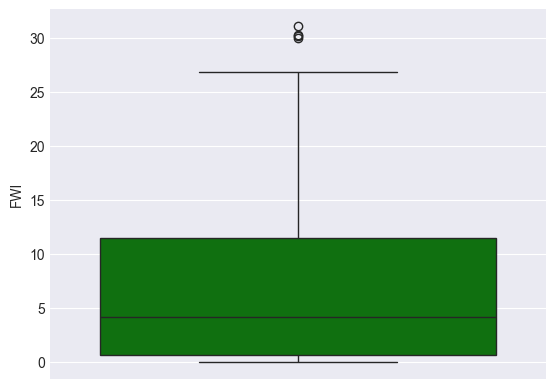

In [153]:
sns.boxplot(df["FWI"], color="green")

In [151]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
x = df.drop('FWI',axis=1)
y = df['FWI']

In [ ]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [ ]:
#train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)


In [ ]:
X_train.shape,X_test.shape

((182, 14), (61, 14))

In [ ]:
X_train = X_train.drop(["day","month","year"],axis=1)

In [ ]:
#Check for MulitiCollinearity

plt.Figure(figsize= (20,20))
corr= X_train.corr()
sns.heatmap(corr,annot=True)

ValueError: could not convert string to float: 'not fire   '

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs (corr_matrix.iloc[i,j])> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_feature = correlation(X_train,0.85)

In [ ]:
#drop features when correlation is more then 0.85
X_train.drop(corr_feature, axis=1, inplace=True)
X_test.drop(corr_feature,axis=1, inplace=True)
X_train.shape,X_test.shape

((181, 8), (61, 12))

In [ ]:
X_test = X_test.drop(["day","month","year"],axis=1)

In [ ]:
X_train.shape, X_test.shape

((181, 7), (61, 8))

In [ ]:
X_test = X_test.drop(["Classes"], axis=1)

In [ ]:
print(f"X_train {X_train.columns}")

print(f"X_test{X_test.columns}")

X_train Index(['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Region'], dtype='object')
X_testIndex(['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Region'], dtype='object')


In [ ]:
#Feature scaling or Standardization

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)


In [ ]:
#Domain expert setups the threshold
correlation(X_train,0.75)

{'ISI'}

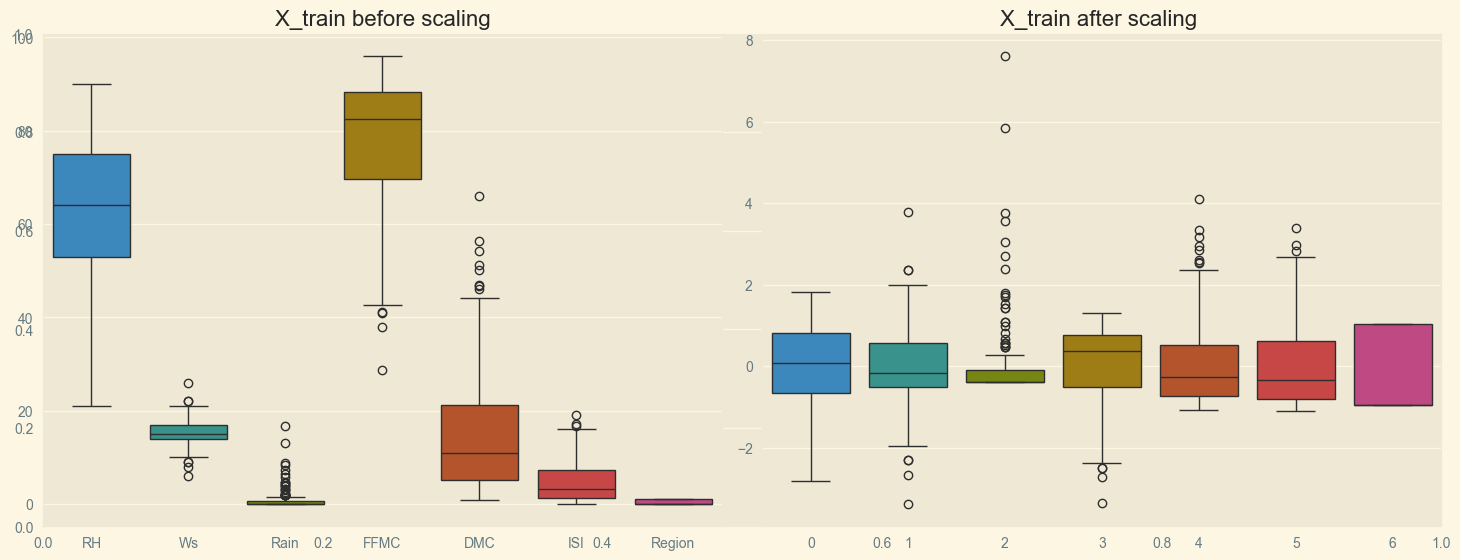

In [ ]:
#Boxplot to understand the effect of standard scalar

plt.subplots(figsize= (15,6))


plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")


plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling ")

plt.tight_layout()
plt.show()

Liner Regression Model


Mean absolute error 0.5788834750437123
r2 Score 0.983550975124605


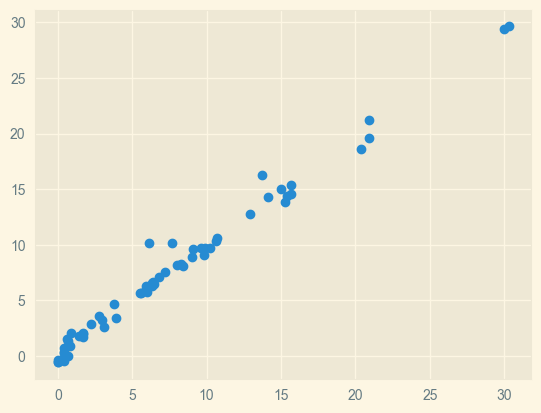

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("r2 Score", score)

plt.scatter(y_test,y_pred)

##Lasso regression

Mean absolute error 1.1505285876260545
r2 Score 0.9495168311775838


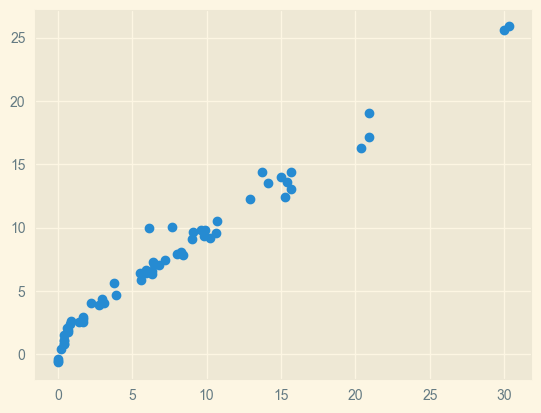

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()

lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("r2 Score", score)

plt.scatter(y_test,y_pred)

#Ridege reggression Model

Mean absolute error 0.6004121406538335
r2 Score 0.9828610595952642


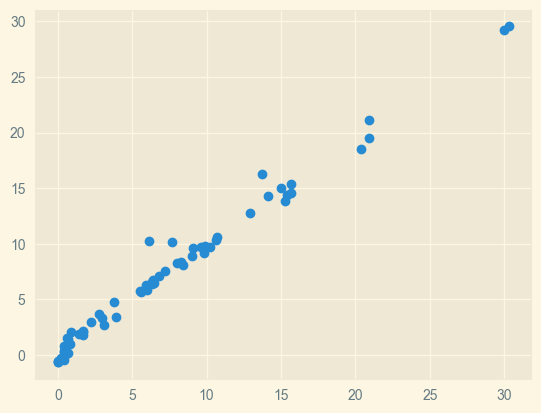

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()

ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("r2 Score", score)

plt.scatter(y_test,y_pred)

In [ ]:
##Elastic NEt

Mean absolute error 1.9038493852932024
r2 Score 0.8734325987723945


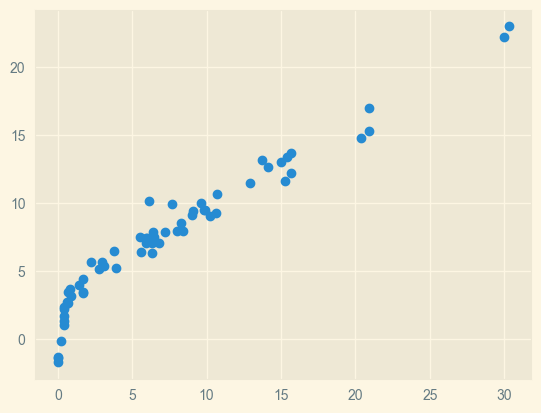

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticNet = ElasticNet()

elasticNet.fit(X_train_scaled,y_train)
y_pred = elasticNet.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("r2 Score", score)

plt.scatter(y_test,y_pred)

##Cross validation using LASSO


In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)



LassoCV(cv=5)

In [ ]:
lassocv.predict(X_train_scaled)

array([ 1.29482133,  4.97224271,  7.20907616,  3.60076039,  1.88689455,
        9.62055599,  5.10760196, 10.22482314, -0.85387744,  7.95395053,
       25.04396501, 15.15097719, 12.24348017, -0.35562757,  1.49766377,
       10.87147376,  2.85082764, 13.66549305, -1.24963163, 11.9134396 ,
        5.48392046,  6.62605089, 13.16647763, 29.15531191,  5.39393071,
       -0.08372434,  0.96847931,  7.01968127,  5.54752049,  3.89750938,
       -0.41499211,  1.09908074,  2.03484886,  4.71080311,  0.15474344,
       -0.1618401 , 19.47338055,  4.32013426,  1.82395265, 13.96139164,
       17.76440104, 14.21252302,  1.08241477, 14.12839208, 12.40236112,
        3.37999724,  0.66739442,  1.54978683,  0.54492777, -0.40094129,
       13.05494954,  4.00162093, -0.3331849 , 19.10617745,  9.56293934,
        5.1518578 ,  7.15449522, 19.45071922, 25.3372513 , 15.95931591,
        0.61806547,  3.74444915,  1.62881086,  1.41572342,  3.83689358,
        4.48054466, -0.47867369, -0.7434407 ,  7.08614622,  3.81

In [ ]:
lassocv.alpha_

np.float64(0.05260219974971987)

In [ ]:
lassocv.alphas_

array([6.95370123, 6.48504504, 6.04797471, 5.64036146, 5.26021997,
       4.90569875, 4.57507108, 4.2667266 , 3.97916351, 3.7109812 ,
       3.46087349, 3.2276222 , 3.01009127, 2.80722119, 2.61802388,
       2.44157783, 2.27702366, 2.12355988, 1.98043905, 1.84696409,
       1.72248489, 1.60639517, 1.49812952, 1.3971606 , 1.30299665,
       1.21517904, 1.13328004, 1.05690076, 0.98566918, 0.91923838,
       0.85728479, 0.79950666, 0.74562259, 0.69537012, 0.6485045 ,
       0.60479747, 0.56403615, 0.526022  , 0.49056988, 0.45750711,
       0.42667266, 0.39791635, 0.37109812, 0.34608735, 0.32276222,
       0.30100913, 0.28072212, 0.26180239, 0.24415778, 0.22770237,
       0.21235599, 0.19804391, 0.18469641, 0.17224849, 0.16063952,
       0.14981295, 0.13971606, 0.13029967, 0.1215179 , 0.113328  ,
       0.10569008, 0.09856692, 0.09192384, 0.08572848, 0.07995067,
       0.07456226, 0.06953701, 0.06485045, 0.06047975, 0.05640361,
       0.0526022 , 0.04905699, 0.04575071, 0.04266727, 0.03979

In [ ]:
lassocv.mse_path_

array([[55.246068  , 59.03542214, 38.63437038, 78.26755879, 52.97493054],
       [48.74951191, 52.94917645, 33.30139475, 76.14273605, 47.35287444],
       [42.8132226 , 46.92294283, 28.54605859, 69.08837908, 42.45009859],
       [37.63265095, 41.60820983, 24.50043408, 62.86862191, 38.17379205],
       [33.11063929, 36.94945683, 21.06595735, 57.3804344 , 33.53423705],
       [29.16244291, 32.86360068, 18.15737855, 52.53382354, 29.15280899],
       [25.71425528, 29.27817696, 15.70088448, 48.25016116, 25.35266103],
       [22.70208378, 26.13039564, 13.63266921, 43.16693579, 22.05716837],
       [20.06993663, 23.36511016, 11.8975177 , 37.99621834, 19.19957862],
       [17.76914518, 20.93435381, 10.44781322, 33.48214672, 16.72298483],
       [15.75732399, 18.79628269,  9.24235004, 29.54000382, 14.57682342],
       [13.99746237, 16.91425739,  8.24558062, 26.09561204, 12.71752565],
       [12.45760394, 15.25669201,  7.42683927, 23.08667389, 11.10723364],
       [11.10962633, 13.79562128,  6.7

Mean absolute error 0.650440726727362
r2 Score 0.9812148619609897


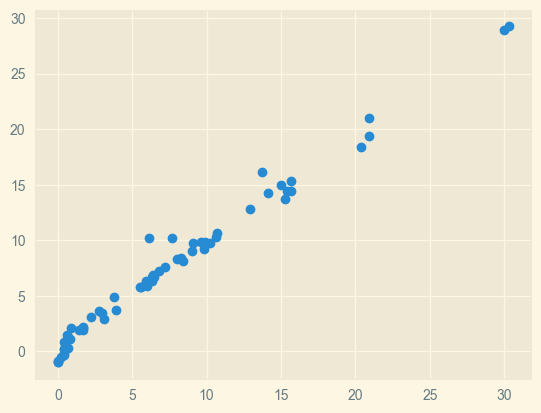

In [ ]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("r2 Score", score)
